# Data Wrangling

Data wrangling, also known as data `cleaning` or data `preprocessing`, refers to the process of `transforming` and preparing raw data into a usable format for analysis. This typically involves cleaning and structuring the data, dealing with missing values and outliers, and transforming the data into a consistent format that can be analyzed.

## Steps: 

The process of data wrangling often includes several steps, such as:

1. Data collection: Gathering data from various sources such as databases, websites, or files.

2. Data cleaning: Removing irrelevant or duplicate data, handling missing values, and correcting inconsistencies.

3. Data transformation: Converting data into a consistent format, such as changing date formats or normalizing categorical data.

4. Data enrichment: Adding additional data or features to the dataset to enhance its usefulness.

5. Data validation: Verifying that the data is accurate and meets the desired quality standards.

Data wrangling is a critical step in the data analysis process, as it helps ensure that the data used in the analysis is accurate and reliable. Properly wrangled data can also save time and effort during the analysis phase, as the data will already be in a suitable format for analysis.

In [9]:
# libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [10]:
df = sns.load_dataset('titanic')

In [11]:
df.isnull().sum()/ len(df)*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [12]:
df.drop(columns='deck', inplace= True)

In [13]:
df['age'] = df.age.fillna(value= df['age'].mean())

In [14]:
df.isnull().sum()/ len(df) *100

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.000000
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.224467
class          0.000000
who            0.000000
adult_male     0.000000
embark_town    0.224467
alive          0.000000
alone          0.000000
dtype: float64

In [19]:
df['embarked'] = df.embarked.fillna(value= df['embarked'].mode()[0])

In [20]:
df.isnull().sum()/ len(df) *100

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.000000
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.000000
class          0.000000
who            0.000000
adult_male     0.000000
embark_town    0.224467
alive          0.000000
alone          0.000000
embarkes       0.000000
dtype: float64

In [21]:
df['embark_town'] = df.embark_town.fillna(value= df['embark_town'].mode()[0])

In [22]:
df.isnull().sum() / len(df)* 100

survived       0.0
pclass         0.0
sex            0.0
age            0.0
sibsp          0.0
parch          0.0
fare           0.0
embarked       0.0
class          0.0
who            0.0
adult_male     0.0
embark_town    0.0
alive          0.0
alone          0.0
embarkes       0.0
dtype: float64

# Outliers Removal

## Visualization Method

<AxesSubplot: xlabel='sex', ylabel='age'>

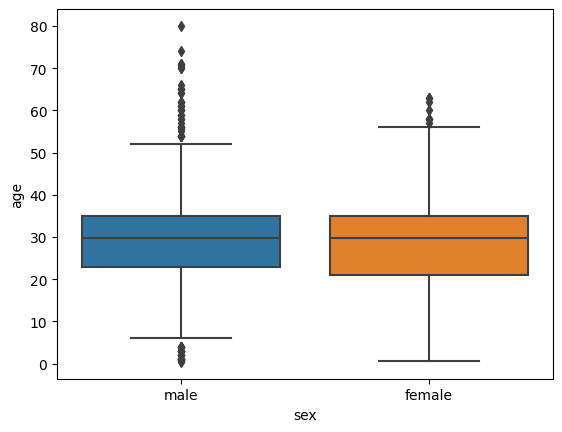

In [26]:
sns.boxplot(data=df, y='age', x= 'sex')

## IQR Method

In [35]:
df = sns.load_dataset('titanic')

In [42]:
df.drop(columns='deck', inplace = True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_1064\2425178226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns='deck', inplace = True)


In [43]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)

IQR = Q3 - Q1
IQR

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['age']> lower_bound) & (df['age'] < upper_bound) ]

In [44]:
df.shape

(703, 14)

In [45]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [46]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [51]:
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)

IQR = Q3 - Q1
IQR

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['fare']> lower_bound) & (df['fare'] < upper_bound) ]

In [48]:
df.shape

(607, 14)

<AxesSubplot: xlabel='fare', ylabel='Count'>

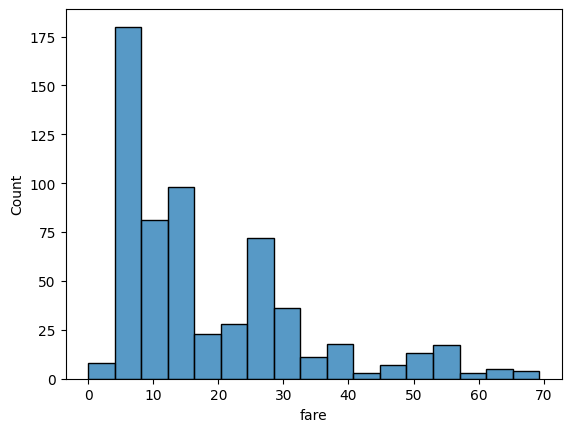

In [50]:
sns.histplot(df['fare'])

# Z-score Method

You can use the z-score method to remove outliers from a dataset in Python using the following steps:

1. Import the necessary libraries:

In [52]:
import numpy as np
import pandas as pd

2. Load the dataset

In [53]:
df = sns.load_dataset('titanic')


3. Calculate the z-score for each data point in the dataset:

In [57]:
numeric_cols = df.select_dtypes(include=np.number).columns
z_scores = np.abs((df[numeric_cols] - df[numeric_cols].mean()) / df[numeric_cols].std())


4. Set a threshold for the z-score above which a data point is considered an outlier. The most common threshold value is 3, but you can adjust this value based on your dataset.

In [59]:
threshold = 3


5. Remove the outliers by filtering the dataset based on the z-score:

In [60]:
df = df[(z_scores < threshold).all(axis=1)]


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 657 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     657 non-null    int64   
 1   pclass       657 non-null    int64   
 2   sex          657 non-null    object  
 3   age          657 non-null    float64 
 4   sibsp        657 non-null    int64   
 5   parch        657 non-null    int64   
 6   fare         657 non-null    float64 
 7   embarked     655 non-null    object  
 8   class        657 non-null    category
 9   who          657 non-null    object  
 10  adult_male   657 non-null    bool    
 11  deck         167 non-null    category
 12  embark_town  655 non-null    object  
 13  alive        657 non-null    object  
 14  alone        657 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 64.6+ KB


In [67]:
df = sns.load_dataset('titanic')

In [68]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [72]:
# Another way

from scipy import stats
import numpy as np

# Select only the numerical columns from df
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
df_num = df[numerical_cols]

# Apply z-score normalization to the numerical columns
zscore = np.abs(stats.zscore(df_num))
threshold = 2
df = df[(zscore < threshold).all(axis=1)]


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     0 non-null      int64   
 1   pclass       0 non-null      int64   
 2   sex          0 non-null      object  
 3   age          0 non-null      float64 
 4   sibsp        0 non-null      int64   
 5   parch        0 non-null      int64   
 6   fare         0 non-null      float64 
 7   embarked     0 non-null      object  
 8   class        0 non-null      category
 9   who          0 non-null      object  
 10  adult_male   0 non-null      bool    
 11  deck         0 non-null      category
 12  embark_town  0 non-null      object  
 13  alive        0 non-null      object  
 14  alone        0 non-null      bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 488.0+ bytes


In [66]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone


# Finding and dropping duplicates

In [77]:
df = sns.load_dataset('titanic')

In [78]:
df.duplicated().sum()

107

In [81]:
df_duplicates = df[df.duplicated()]


In [82]:
df_duplicates

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
47,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True
76,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
77,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
87,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
95,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,0,3,male,26.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
877,0,3,male,19.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True


In [83]:
df.drop_duplicates(inplace=True)

In [76]:
df.shape

(784, 15)

# Data Normalization

Steps :
1. Min-Max normalization
2. Winsorization
3. Z-score normalization
4. Decimal Scaling
5. Log Transformation
6. Standard scaler

## Min-Max Scaling and Standard Scaler

In [3]:
# import libraries
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# dataset
df = sns.load_dataset('titanic')


# select columns to normalize
cols_to_normalize = ['age', 'fare']

# create the scaler function
scaler = MinMaxScaler()

# fit and transform the data on scaler 
df[cols_to_normalize]= scaler.fit_transform(df[cols_to_normalize])

# Check the data
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,0.271174,1,0,0.014151,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,0.472229,1,0,0.139136,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,0.321438,0,0,0.015469,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,0.434531,1,0,0.103644,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,0.434531,0,0,0.015713,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0.334004,0,0,0.025374,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,0.233476,0,0,0.058556,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,0.045771,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,0.321438,0,0,0.058556,C,First,man,True,C,Cherbourg,yes,True


In [4]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.367921,0.523008,0.381594,0.062858
std,0.486592,0.836071,0.182540,1.102743,0.806057,0.096995
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.247612,0.000000,0.000000,0.015440
50%,0.000000,3.000000,0.346569,0.000000,0.000000,0.028213
75%,1.000000,3.000000,0.472229,1.000000,0.000000,0.060508
max,1.000000,3.000000,1.000000,8.000000,6.000000,1.000000


In [5]:
# import libraries
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler

# dataset
df = sns.load_dataset('titanic')


# select columns to normalize
cols_to_normalize = ['age', 'fare']

# create the scaler function
scaler = StandardScaler()

# fit and transform the data on scaler 
df[cols_to_normalize]= scaler.fit_transform(df[cols_to_normalize])

# Check the data
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,-0.530377,1,0,-0.502445,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,0.571831,1,0,0.786845,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,-0.254825,0,0,-0.488854,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,0.365167,1,0,0.420730,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,0.365167,0,0,-0.486337,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,-0.185937,0,0,-0.386671,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,-0.737041,0,0,-0.044381,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,-0.176263,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,-0.254825,0,0,-0.044381,C,First,man,True,C,Cherbourg,yes,True


In [6]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,7.140000e+02,891.000000,891.000000,8.910000e+02
mean,0.383838,2.308642,2.388379e-16,0.523008,0.381594,3.987333e-18
std,0.486592,0.836071,1.000701e+00,1.102743,0.806057,1.000562e+00
min,0.000000,1.000000,-2.016979e+00,0.000000,0.000000,-6.484217e-01
25%,0.000000,2.000000,-6.595416e-01,0.000000,0.000000,-4.891482e-01
50%,0.000000,3.000000,-1.170488e-01,0.000000,0.000000,-3.573909e-01
75%,1.000000,3.000000,5.718310e-01,1.000000,0.000000,-2.424635e-02
max,1.000000,3.000000,3.465126e+00,8.000000,6.000000,9.667167e+00


## Log Transformation

In [7]:
import numpy as np

# Generate a sample dataset
titanic = sns.load_dataset('titanic')

# Apply log transformation to the data
titanic['age'] = titanic['age'].fillna(titanic['age'].median())
titanic['fare'] = titanic['fare'].fillna(titanic['fare'].median())

# log transform
titanic['age']= np.log(titanic['age'])
titanic['fare']= np.log(titanic['fare'])

titanic.head()


c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,3.091042,1,0,1.981001,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,3.637586,1,0,4.266662,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,3.258097,0,0,2.070022,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,3.555348,1,0,3.972177,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,3.555348,0,0,2.085672,S,Third,man,True,NaN,Southampton,no,True


<AxesSubplot: xlabel='sex', ylabel='fare'>

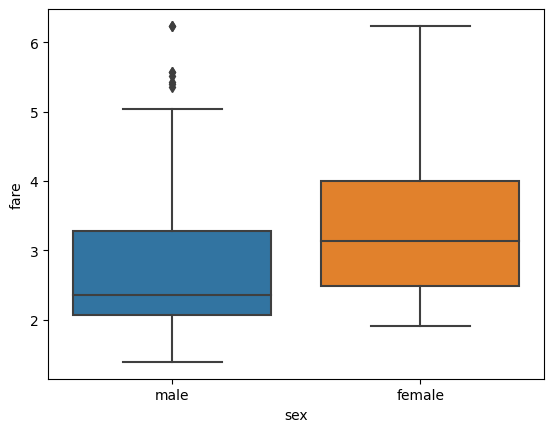

In [9]:
sns.boxplot(data=titanic, x='sex', y='fare')

<AxesSubplot: xlabel='age', ylabel='Count'>

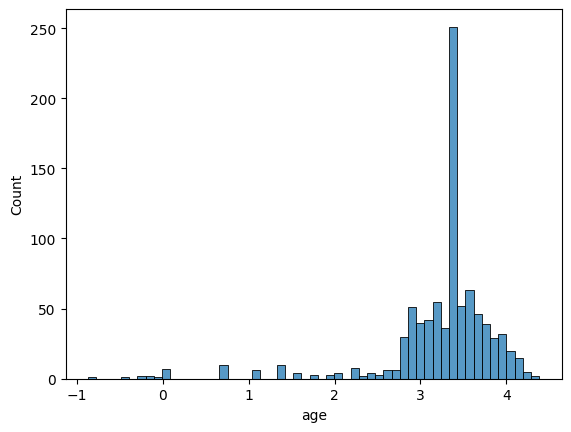

In [10]:
sns.histplot(titanic['age'])

# Organizing the Data

In [14]:
df['family_size']= df['sibsp']+ df['parch'] + 1

<AxesSubplot: xlabel='family_size', ylabel='Count'>

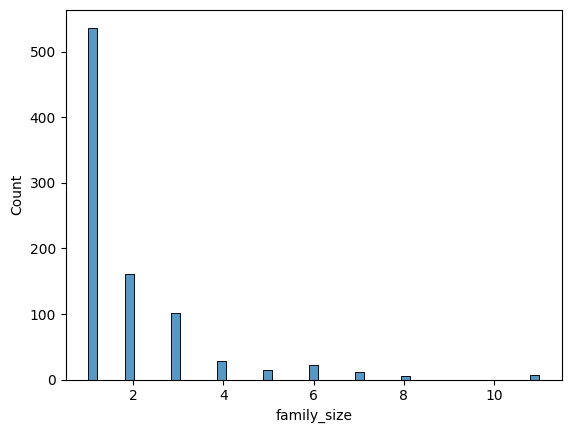

In [15]:
sns.histplot(df['family_size'])

<AxesSubplot: xlabel='sex', ylabel='age'>

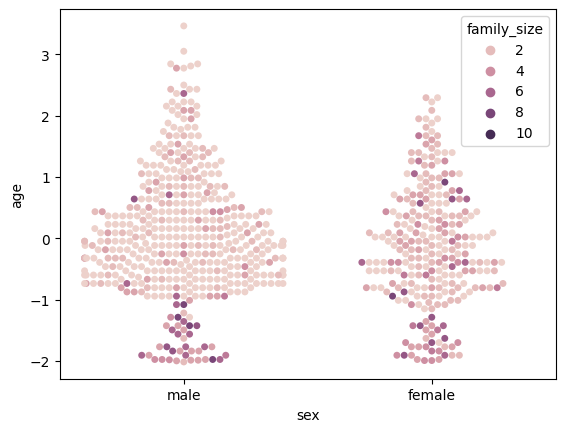

In [19]:
sns.swarmplot(data=df, x='sex', y='age',hue='family_size' )

In [20]:
df = df.rename(columns= {'survived': "Survival"})

In [21]:
df.columns

Index(['Survival', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone', 'family_size'],
      dtype='object')

In [26]:
table = pd.pivot_table(df, values='fare', index='pclass', columns='Survival', aggfunc=np.sum)


In [27]:
table

Survival,0,1
pclass,,
1,52.317648,173.619789
2,-24.983369,-17.777322
3,-138.827900,-44.348846


<AxesSubplot: xlabel='fare', ylabel='age'>

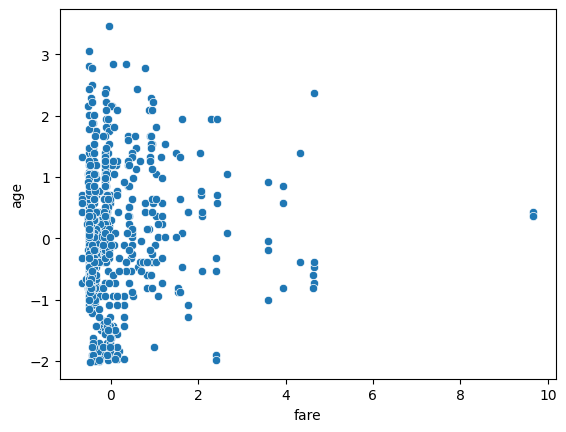

In [28]:
sns.scatterplot(data=df, x='fare', y='age')